# Task 1 - Data Analysis and Preprocessing

In [12]:
import pandas as pd
import numpy as np
import os
import sys
import ipaddress
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
sys.path.append(os.path.abspath("../Data_Analysis"))
import warnings
warnings.filterwarnings("ignore")

In [13]:
os.chdir("..")

In [14]:
from Data_Analysis.data_loader import load_datasets
from Data_Analysis.data_cleaning import clean_data
from Data_Analysis.EDA import univariate_analysis, bivariate_analysis
from Data_Analysis.geolocation_merge import merge_with_geolocation
from Data_Analysis.feature_engineering import add_time_features, transaction_frequency
from Data_Analysis.data_transformation import transform_data

1. Handle Missing Values : Impute or drop missing values

In [15]:
fraud_df, ip_df = load_datasets()
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,7.327584e+08,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,3.503114e+08,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2.621474e+09,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3.840542e+09,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,4.155831e+08,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3.451155e+09,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2.439047e+09,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2.748471e+09,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3.601175e+09,0


In [16]:
ip_df.head()

,lower_bound_ip_address,upper_bound_ip_address,country
0,16777216.0,16777471,Australia
1,16777472.0,16777727,China
2,16777728.0,16778239,China
3,16778240.0,16779263,Australia
4,16779264.0,16781311,China


2. Data Cleaning :Remove duplicates and Correct data types

In [17]:
fraud_df = clean_data(fraud_df)
fraud_df 

Initial shape: (151112, 11)


,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368.79972,0
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387.865908,0
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.11095,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443.91396,0
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117.452712,0
...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3451154526.62433,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2439047221.24922,0
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2748470523.70511,0
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3601174708.16967,0


In [18]:
# Data type of two datasets
pd.concat([fraud_df.dtypes.rename('fraud_df'), ip_df.dtypes.rename('ip_df')], axis=1)

,fraud_df,ip_df
user_id,int64,NaN
signup_time,datetime64[ns],NaN
purchase_time,datetime64[ns],NaN
purchase_value,int64,NaN
device_id,object,NaN
source,object,NaN
browser,object,NaN
sex,object,NaN
age,int64,NaN
ip_address,object,NaN


3. Exploratory Data Analysis (EDA) :Univariate analysis

for Fraud dataset

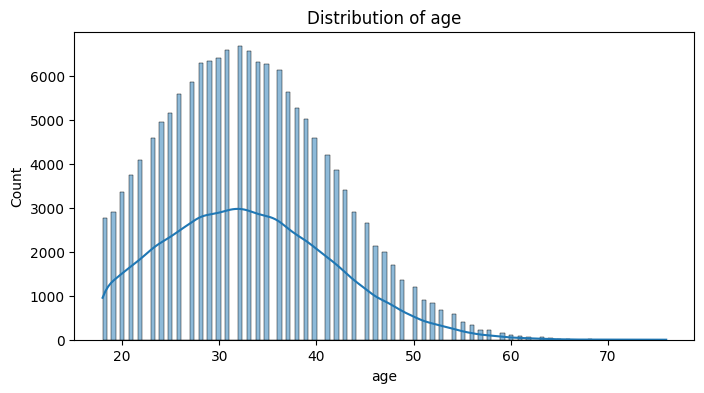

In [21]:
univariate_analysis(fraud_df, 'age')

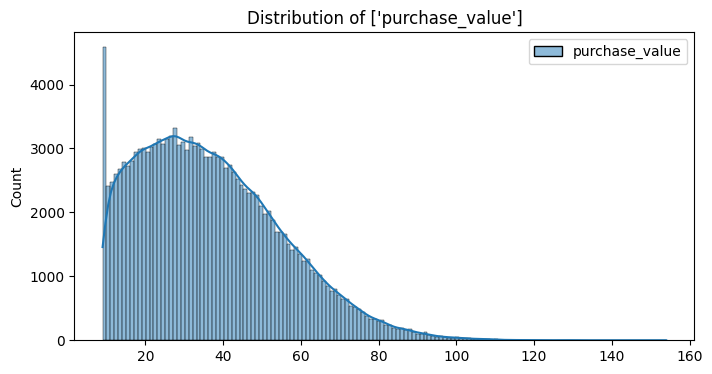

In [22]:
  # EDA for Univariate analysis
univariate_analysis(fraud_df, ['purchase_value'])

for IP Address dataset

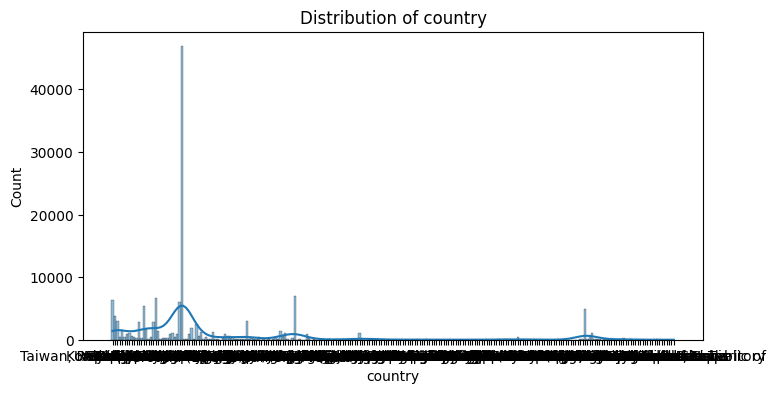

In [23]:
univariate_analysis(ip_df, 'country')

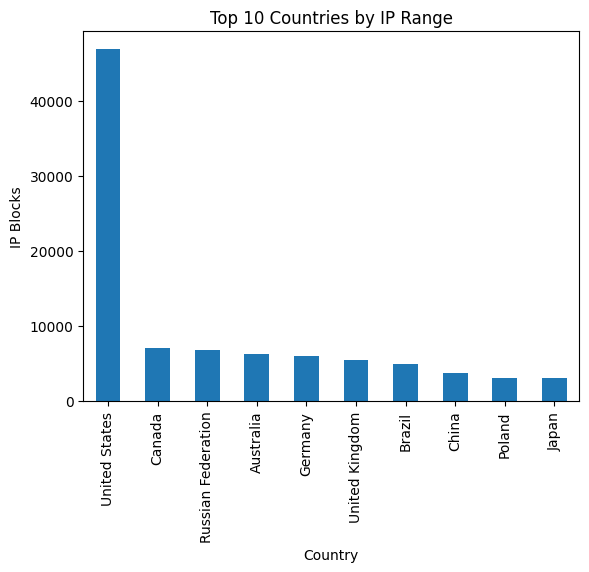

In [24]:
# Frequency of top 10 countries
ip_df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries by IP Range')
plt.xlabel('Country')
plt.ylabel('IP Blocks')
plt.show()

array([[<Axes: title={'center': 'user_id'}>,
        <Axes: title={'center': 'signup_time'}>],
       [<Axes: title={'center': 'purchase_time'}>,
        <Axes: title={'center': 'purchase_value'}>],
       [<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'class'}>]], dtype=object)

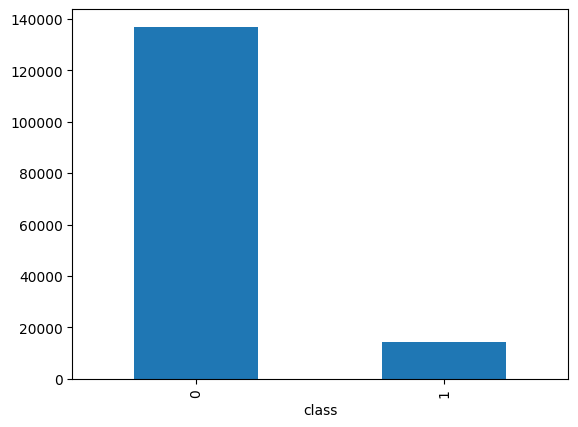

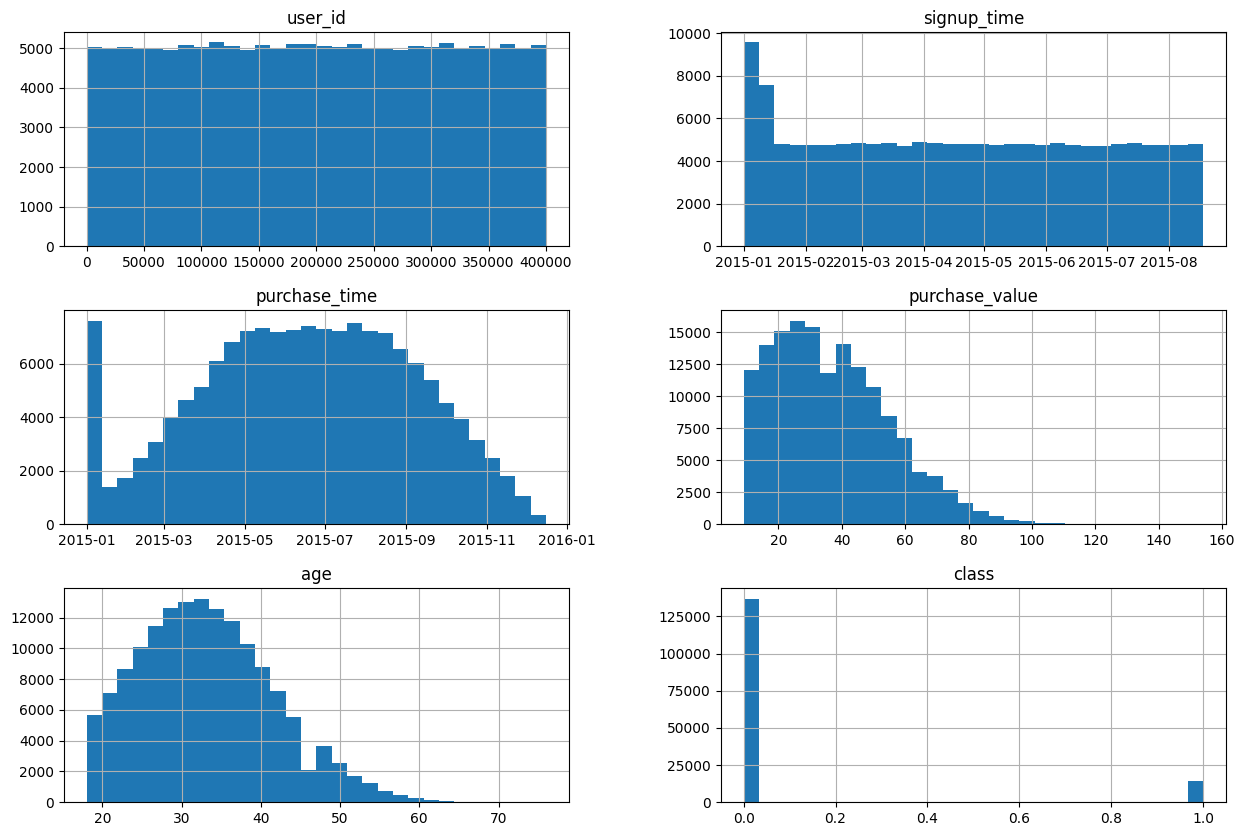

In [25]:
fraud_df['class'].value_counts().plot(kind='bar')
fraud_df.hist(bins=30, figsize=(15,10))

Bivariate analysis

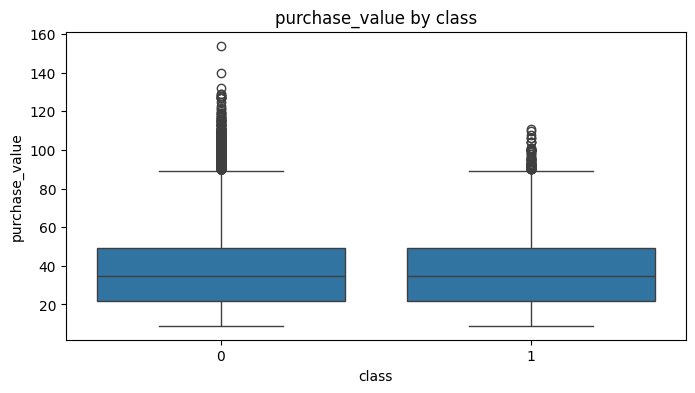

In [27]:
bivariate_analysis(fraud_df, 'class', 'purchase_value')

<Axes: xlabel='class', ylabel='purchase_value'>

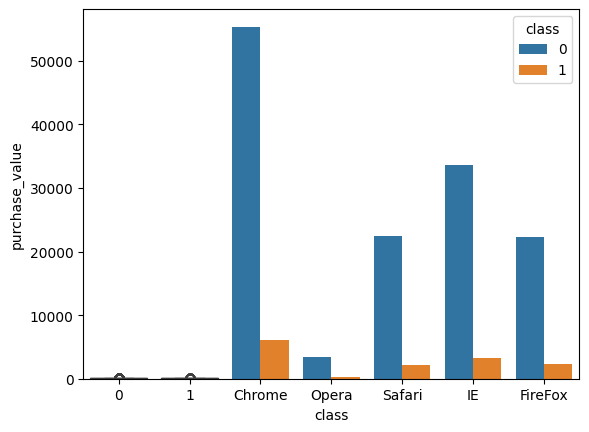

In [28]:
sns.boxplot(x='class', y='purchase_value', data=fraud_df)
sns.countplot(x='browser', hue='class', data=fraud_df)

4. Merge Datasets for Geolocation Analysis: Convert IP addresses to integer format

Convert IP addresses to integer format
Merge Fraud_Data.csv with IpAddress_to_Country.csv

In [30]:
fraud_df = merge_with_geolocation(fraud_df, ip_df)
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_int,country
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368.79972,0,None,Unknown
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387.865908,0,None,Unknown
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.11095,1,None,Unknown
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443.91396,0,None,Unknown
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117.452712,0,None,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3451154526.62433,1,None,Unknown
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2439047221.24922,0,None,Unknown
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2748470523.70511,0,None,Unknown
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3601174708.16967,0,None,Unknown


5. Feature Engineering :Transaction frequency and velocity for Fraud_Data.csv

In [31]:
fraud_df = add_time_features(fraud_df)
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_int,country,hour_of_day,day_of_week,time_since_signup
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368.79972,0,None,Unknown,2,5,1251.856111
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387.865908,0,None,Unknown,1,0,4.984444
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.11095,1,None,Unknown,18,3,0.000278
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443.91396,0,None,Unknown,13,0,136.690278
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117.452712,0,None,Unknown,18,2,1211.516944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3451154526.62433,1,None,Unknown,0,6,1461.453611
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2439047221.24922,0,None,Unknown,12,1,258.686111
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2748470523.70511,0,None,Unknown,7,2,1856.004444
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3601174708.16967,0,None,Unknown,9,0,1429.477500


In [32]:
fraud_df = add_time_features(fraud_df)
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_int,country,hour_of_day,day_of_week,time_since_signup
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368.79972,0,None,Unknown,2,5,1251.856111
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387.865908,0,None,Unknown,1,0,4.984444
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.11095,1,None,Unknown,18,3,0.000278
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443.91396,0,None,Unknown,13,0,136.690278
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117.452712,0,None,Unknown,18,2,1211.516944
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3451154526.62433,1,None,Unknown,0,6,1461.453611
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2439047221.24922,0,None,Unknown,12,1,258.686111
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2748470523.70511,0,None,Unknown,7,2,1856.004444
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3601174708.16967,0,None,Unknown,9,0,1429.477500


In [33]:
fraud_df = transaction_frequency(fraud_df)
fraud_df

,user_id,signup_time,purchase_time,purchase_value,device_id,source,browser,sex,age,ip_address,class,ip_int,country,hour_of_day,day_of_week,time_since_signup,transaction_count
0,22058,2015-02-24 22:55:49,2015-04-18 02:47:11,34,QVPSPJUOCKZAR,SEO,Chrome,M,39,732758368.79972,0,None,Unknown,2,5,1251.856111,1
1,333320,2015-06-07 20:39:50,2015-06-08 01:38:54,16,EOGFQPIZPYXFZ,Ads,Chrome,F,53,350311387.865908,0,None,Unknown,1,0,4.984444,1
2,1359,2015-01-01 18:52:44,2015-01-01 18:52:45,15,YSSKYOSJHPPLJ,SEO,Opera,M,53,2621473820.11095,1,None,Unknown,18,3,0.000278,1
3,150084,2015-04-28 21:13:25,2015-05-04 13:54:50,44,ATGTXKYKUDUQN,SEO,Safari,M,41,3840542443.91396,0,None,Unknown,13,0,136.690278,1
4,221365,2015-07-21 07:09:52,2015-09-09 18:40:53,39,NAUITBZFJKHWW,Ads,Safari,M,45,415583117.452712,0,None,Unknown,18,2,1211.516944,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151107,345170,2015-01-27 03:03:34,2015-03-29 00:30:47,43,XPSKTWGPWINLR,SEO,Chrome,M,28,3451154526.62433,1,None,Unknown,0,6,1461.453611,1
151108,274471,2015-05-15 17:43:29,2015-05-26 12:24:39,35,LYSFABUCPCGBA,SEO,Safari,M,32,2439047221.24922,0,None,Unknown,12,1,258.686111,1
151109,368416,2015-03-03 23:07:31,2015-05-20 07:07:47,40,MEQHCSJUBRBFE,SEO,IE,F,26,2748470523.70511,0,None,Unknown,7,2,1856.004444,1
151110,207709,2015-07-09 20:06:07,2015-09-07 09:34:46,46,CMCXFGRHYSTVJ,SEO,Chrome,M,37,3601174708.16967,0,None,Unknown,9,0,1429.477500,1


6. Data Transformation: Handle Class Imbalance: Analyze the class distribution. Research and apply appropriate sampling techniques (e.g., SMOTE for oversampling, Random Undersampling) to the training data only. Justify your choice

In [34]:
X_train, X_test, y_train, y_test = transform_data(fraud_df, 'class')

print("Data transformation complete. Shapes:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)

Data transformation complete. Shapes:
X_train: (219176, 281487)
X_test: (30223, 281487)
